# Andes ieee39 vsg -- Trip Gen

Case: 'ieee39_vsg'  --- REGCV1 (vsg-controlled inverter) connect to  BUS30, 38, 39 <br>
Disturbance: GENROU2 is tripped at 1s

REGCV1 is more stable than REGCV2

Tips regarding andes:

1. static Gen is for power flow calculation, including 'PV' and 'Slack' <br>
dynamci Gen is for TDS, indlucing 'GENROW' and 'GENCAL'

2. Do not connect VSG to a GENROW <br>
VSG needs to share power from unit static gen


## TODO Debug dynamic parameters
Problem: inner loop gains kpvd are 500, which seems to be too large

do incremental test:

1） remove one GENROU, + disturbance

2） connect one VSG without dynamic response, + disturbance

3） one VSG with dynamic response, + distrubance

4） Four VSG ....


In [21]:
import andes
import os
import pandapower as pp

# andes and pandapower version
print(f'Andes version: {andes.__version__}')
print(f'Pandapower version: {pp.__version__}')

Andes version: 1.7.0.post41.dev0+g6e347abf
Pandapower version: 2.8.0


In [22]:
# Choose case
dir_path = os.path.abspath('..')
case_path = '/VIS_opf/ieee39_vis.xlsx'
case = dir_path + case_path

ssa = andes.load(case,
                 setup=True,
                 no_output=True,
                 default_config=False)

In [23]:
# Turn on numba to accelerate TDS
ssa.config.numba
ssa.PFlow.run()

True

GENROU (xl <= xd2) out of typical upper limit.

   idx     | values | limit
-----------+--------+------
 GENROU_2  | 0.042  | 0.036
 GENROU_3  | 0.036  | 0.003
 GENROU_4  | 0.025  | 0.001
 GENROU_5  | 0.050  | 0.001
 GENROU_7  | 0.031  | 0.002
 GENROU_10 | 0.003  | 0.000


Singular matrix. Case is not solvable
/Users/buxinshe/Documents/git-repo/andes/andes/routines/eig.py:221: LinAlgWarning: Ill-conditioned matrix (rcond=1.19563e-21): result may not be accurate.
  WT = solve(N, Weye, overwrite_b=True)


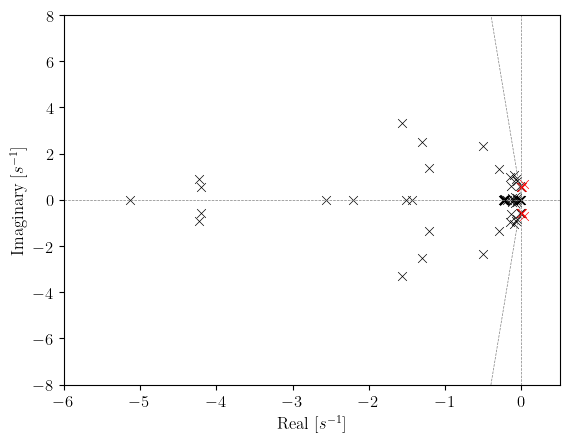

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Real [$s^{-1}$]', ylabel='Imaginary [$s^{-1}$]'>)

In [24]:
ssa.EIG.run()
ssa.EIG.plot()

In [25]:
ssa.TDS.config.tf = 50
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

<Toggler Toggler_1>: GENROU.GENROU_2 status changed to 0 at t=5.0 sec.


True

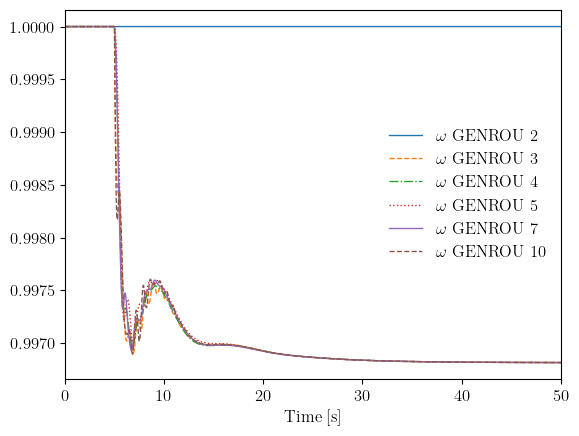

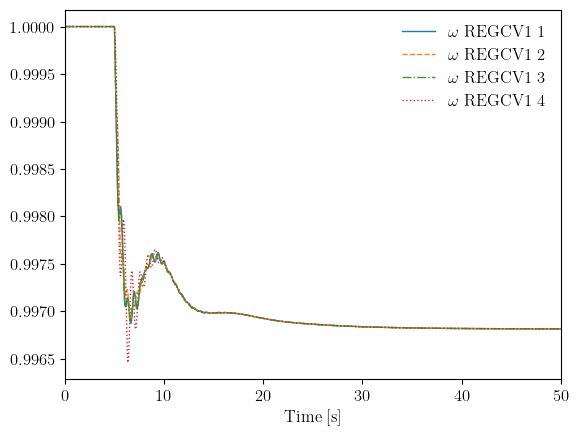

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [26]:
ssa.TDS.plt.plot(ssa.GENROU.omega)
ssa.TDS.plt.plot(ssa.REGCV1.omega)

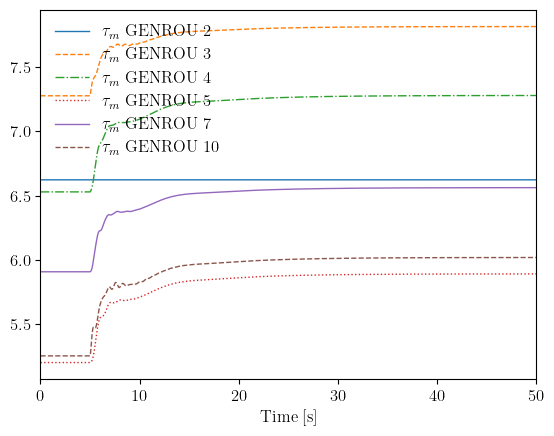

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [27]:
ssa.TDS.plt.plot(ssa.GENROU.tm)

hline1, hline2, vline1, and vline2 are deprecated. Use `hline` and `vline`.


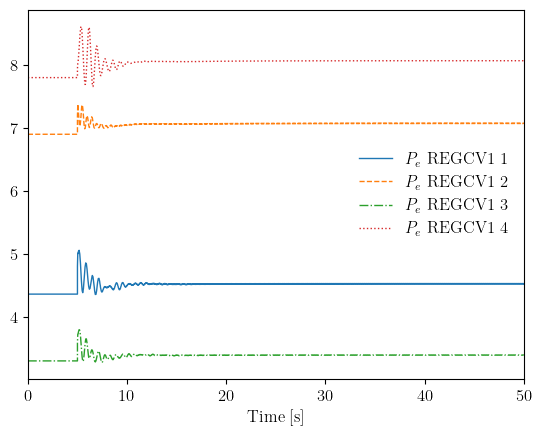

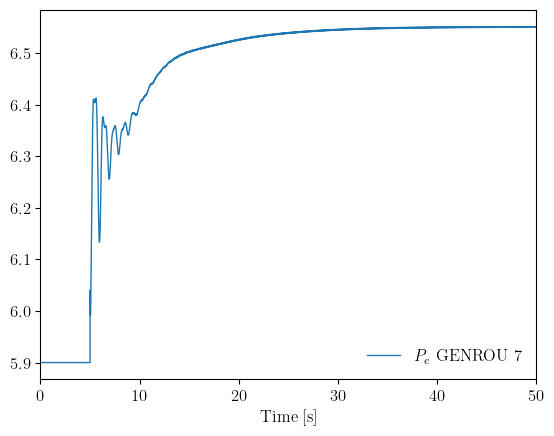

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [28]:
ssa.TDS.plt.plot(ssa.REGCV1.Pe, hline1=0.1)

ssa.TDS.plt.plot(ssa.GENROU.Pe, a=4)

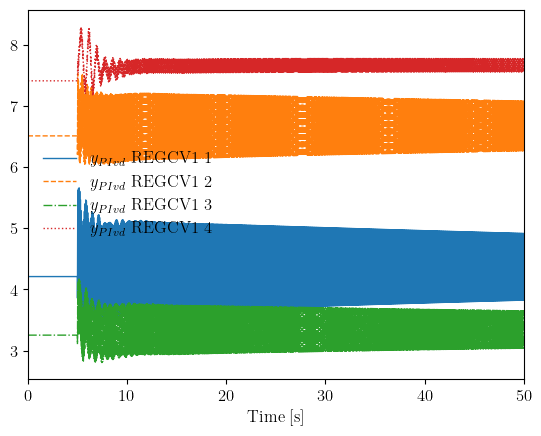

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [29]:
ssa.TDS.plt.plot(ssa.REGCV1.PIvd_y)

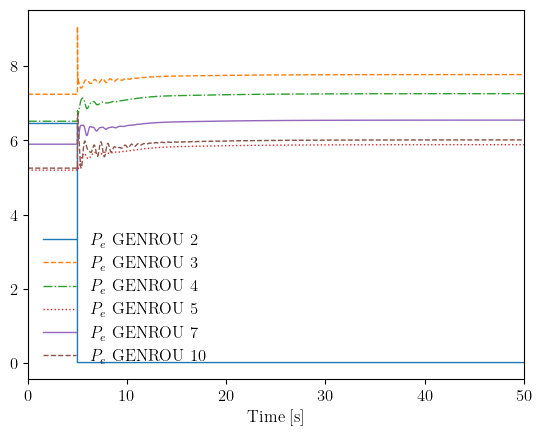

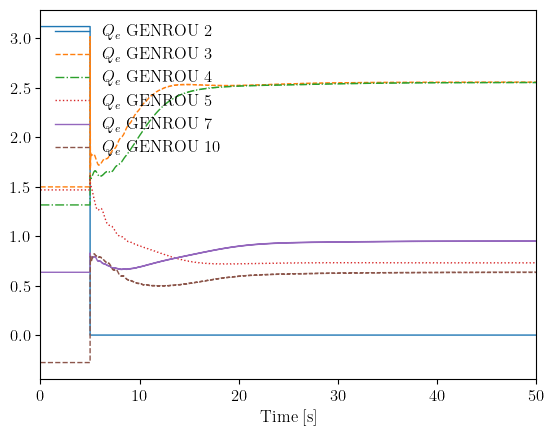

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [30]:
ssa.TDS.plt.plot(ssa.GENROU.Pe)
ssa.TDS.plt.plot(ssa.GENROU.Qe)